<h1><b><font color='blue'>Data Preprocessing</font></b></h1>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r'/content/CAR DETAILS FROM CAR DEKHO.csv');
df=pd.DataFrame(df)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df_num=df.select_dtypes(include=['int64'])
df_num=pd.DataFrame(df_num)

In [ ]:
df_cat=df.select_dtypes(include=['object'])
df_cat=pd.DataFrame(df_cat)

In [ ]:
for i in list(df_cat.columns):
  print(df_cat[i].unique())

['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [ ]:
df_cat.head()

,name,fuel,seller_type,transmission,owner
0,Maruti 800 AC,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,Diesel,Individual,Manual,Second Owner


In [ ]:
cleanup_nums = {"fuel":     {"Petrol": 1, "Diesel": 2,"CNG":3,"LPG":4,"Electric":5},
                "seller_type": {'Individual':1, 'Dealer':3, 'Trustmark Dealer':3},
                "transmission":{'Manual':1, 'Automatic':2},
                "owner":{'First Owner':1, 'Second Owner':2, 'Fourth & Above Owner':4, 'Third Owner':3,'Test Drive Car':5}
                }

In [ ]:
df_new=df.copy()

In [ ]:
df_new = df_new.replace(cleanup_nums)
df_new.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,1,1,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,1,1,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,2,1,1,1
3,Datsun RediGO T Option,2017,250000,46000,1,1,1,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,2,1,1,2


In [ ]:
correlation=df_new.drop(['name','year'],axis=1).corr()

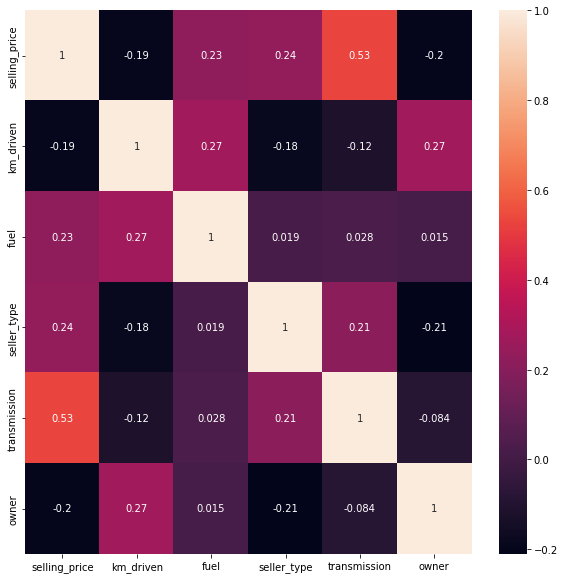

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)


In [ ]:
df_new.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,1,1,1


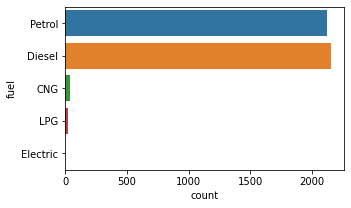

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(y='fuel',data=df)
plt.show()

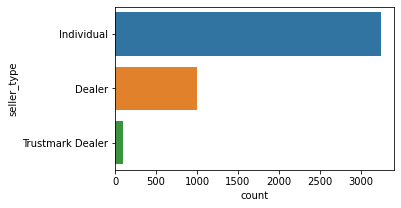

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(y='seller_type',data=df)
plt.show()

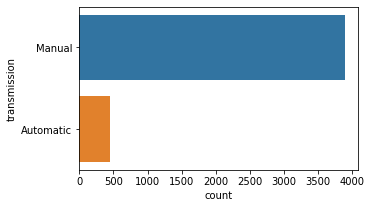

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(y='transmission',data=df)
plt.show()

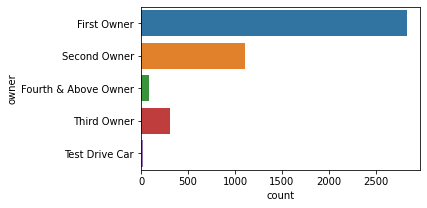

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(y='owner',data=df)
plt.show()

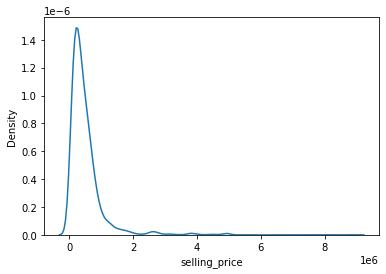

In [ ]:
sns.kdeplot(df['selling_price'])
plt.show()

# 5 lakh max sales...


<h1><b><font color='red'>Removing Outliers</font></b></h1>

In [ ]:
std_dv=df['selling_price'].std()
mean=df['selling_price'].mean()

In [ ]:
df_new=df_new.where((df_new['selling_price']>(mean-3*std_dv)) | (df_new['selling_price']<(mean+3*std_dv)))

<h1><b><font color='blue'>Hierarchical Clustering</font></b></h1>

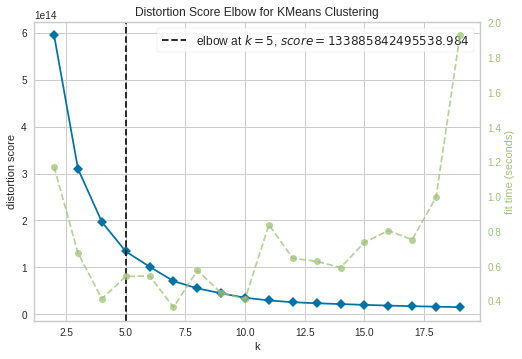

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model=KMeans()
visualizer=KElbowVisualizer(model,k=(2,20),metric="distortion")
visualizer.fit(df_new.drop(['name'],axis=1))
visualizer.show()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [40.0, 40.0, 62.5, 62.5],
  [25.0, 25.0, 51.25, 51.25],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [145.0, 145.0, 163.75, 163.75],
  [135.0, 135.0, 154.375, 154.375],
  [125.0, 125.0, 144.6875, 144.6875],
  [115.0, 115.0, 134.84375, 134.84375],
  [105.0, 105.0, 124.921875, 124.921875],
  [95.0, 95.0, 114.9609375, 114.9609375],
  [85.0, 85.0, 104.98046875, 104.98046875],
  [195.0, 195.0, 205.0, 205.0],
  [94.990234375, 94.990234375, 200.0, 200.0],
  [38.125, 38.125, 147.4951171875, 147.4951171875],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [220.0, 220.0, 242.5, 242.5],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 355.0, 370.0, 370.0],
  [345.0, 345.0, 362.5, 362.5],
  [335.0, 335.0, 353.75, 353.75],
  [325.0, 325.0, 344.375, 344.375],
  [315.0, 315.0, 334.6875,

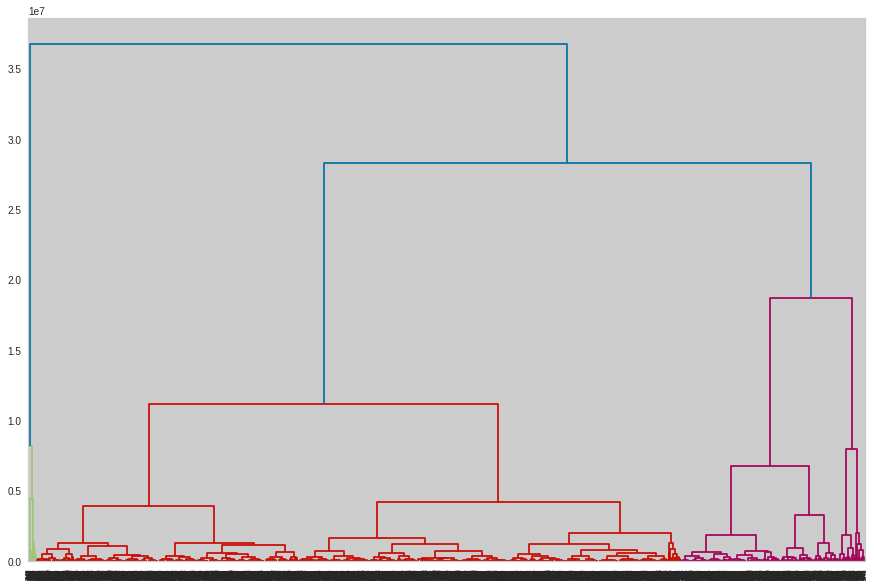

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

Z_ward=linkage(df_new.drop(['name'],axis=1),method='ward',metric='euclidean',optimal_ordering=False)
plt.figure(figsize=(15,10))
dendrogram(Z_ward,p=30)

<h1><b><font color='blue'>K-means Clustering</font></b></h1>

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(2)
df_pca=pca.fit_transform(df_new.drop(['name'],axis=1))

In [ ]:
df_pca

array([[-444132.30552882,   -3143.97570073],
       [-368829.4595597 ,  -21971.65182519],
       [  95334.03935223,   35275.58630849],
       ...,
       [-394341.16978662,   10634.36964035],
       [ 360457.78364224,   29410.41618773],
       [-278684.42394181,  -30566.56677374]])

In [ ]:
wcss=[]

for i in range(1,11):
  km=KMeans(n_clusters=i)
  km.fit_predict(df_pca)
  wcss.append(km.inertia_)

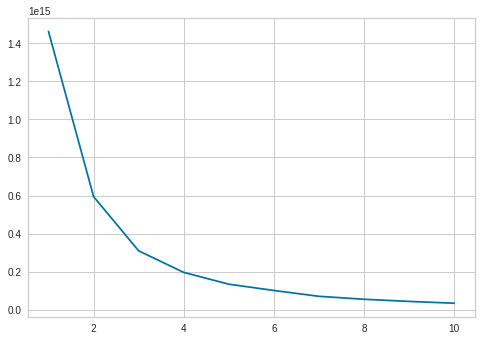

In [ ]:
plt.plot(range(1,11),wcss)

In [ ]:
xx=df_pca
km=KMeans(n_clusters=3)
grp_predicted=km.fit_predict(xx)

In [ ]:
grp_predicted

array([0, 0, 2, ..., 0, 2, 0], dtype=int32)

In [ ]:
df_pca=pd.DataFrame(df_pca)
df_pca['group']=pd.DataFrame(grp_predicted)
df_pca.columns=['pca1','pca2','group']

In [ ]:
df_pca.head()


,pca1,pca2,group
0,-444132.305529,-3143.975701,0
1,-368829.459560,-21971.651825,0
2,95334.039352,35275.586308,2
3,-253781.056800,-24177.333273,0
4,-55287.251121,73930.816832,0


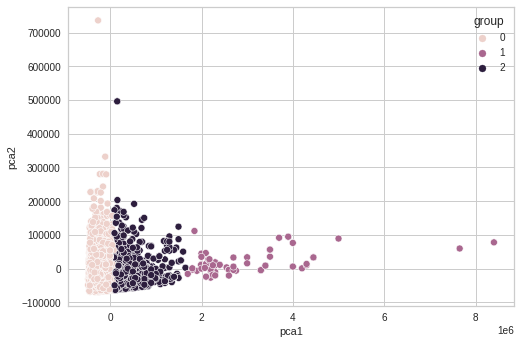

In [ ]:
sns.scatterplot(data=df_pca,x=df_pca['pca1'],y=df_pca['pca2'],hue='group')
plt.show()